<a href="https://colab.research.google.com/github/Srivastava27/collabPython/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69])

<Axes: >

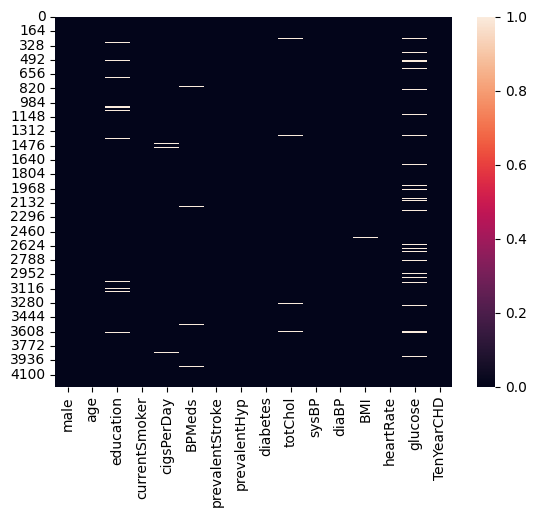

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.eq(0).sum()

male               2419
age                   0
education             0
currentSmoker      2144
cigsPerDay         2144
BPMeds             4061
prevalentStroke    4213
prevalentHyp       2922
diabetes           4129
totChol               0
sysBP                 0
diaBP                 0
BMI                   0
heartRate             0
glucose               0
TenYearCHD         3594
dtype: int64

In [9]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
df.fillna(df.mean(),inplace=True)

In [13]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


<Axes: >

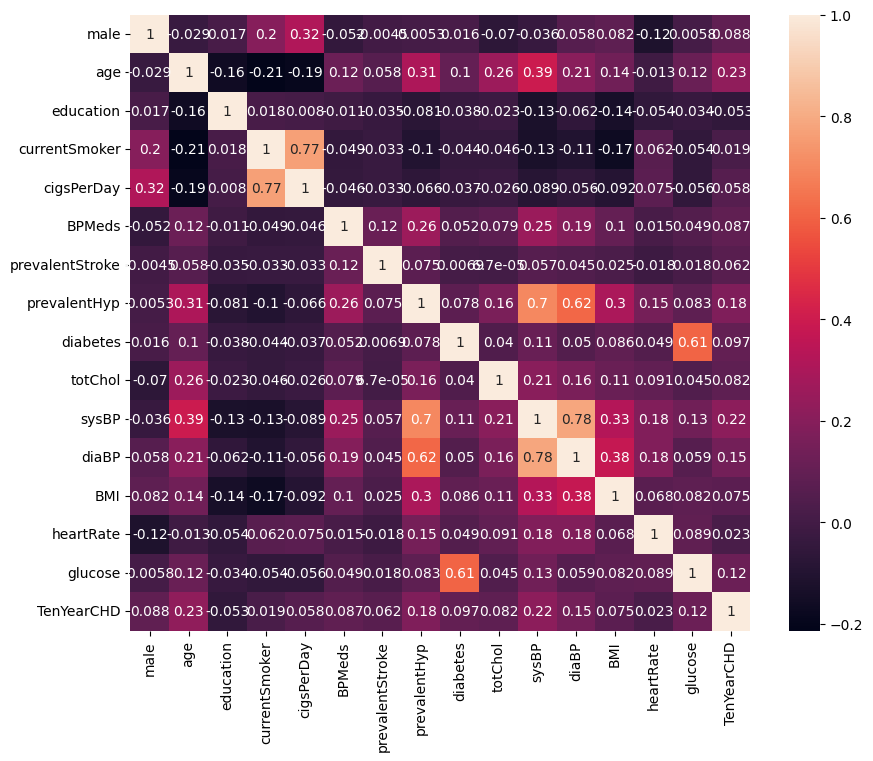

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
df.corr()['age'].sort_values(ascending=True)

currentSmoker     -0.213748
cigsPerDay        -0.192366
education         -0.163613
male              -0.028979
heartRate         -0.012819
prevalentStroke    0.057655
diabetes           0.101258
glucose            0.116850
BPMeds             0.121980
BMI                0.135283
diaBP              0.206104
TenYearCHD         0.225256
totChol            0.260270
prevalentHyp       0.307194
sysBP              0.394302
age                1.000000
Name: age, dtype: float64

In [17]:
x=df[['age','male']]
y=df['age']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [22]:
knn=KNeighborsClassifier(8)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [24]:
predictions=knn.predict(x_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.70      1.00      0.82         7
          35       1.00      1.00      1.00        17
          36       1.00      1.00      1.00        28
          37       1.00      1.00      1.00        35
          38       1.00      1.00      1.00        54
          39       1.00      1.00      1.00        60
          40       1.00      1.00      1.00        47
          41       1.00      1.00      1.00        59
          42       1.00      1.00      1.00        67
          43       1.00      1.00      1.00        63
          44       1.00      1.00      1.00        60
          45       1.00      1.00      1.00        46
          46       1.00      1.00      1.00        55
          47       1.00      1.00      1.00        53
          48       1.00      1.00      1.00        56
          49       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import cross_val_score

In [32]:
ks=list(range(1,100,2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]